In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

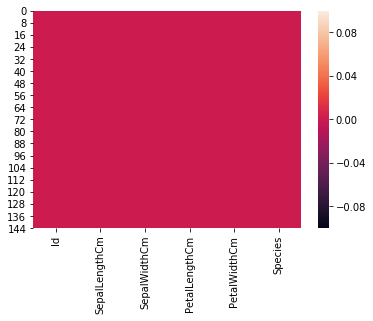

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
"""Exploratory Data Analysis"""

'Exploratory Data Analysis'

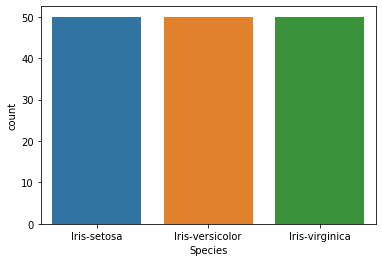

In [11]:
sns.countplot(df.Species)

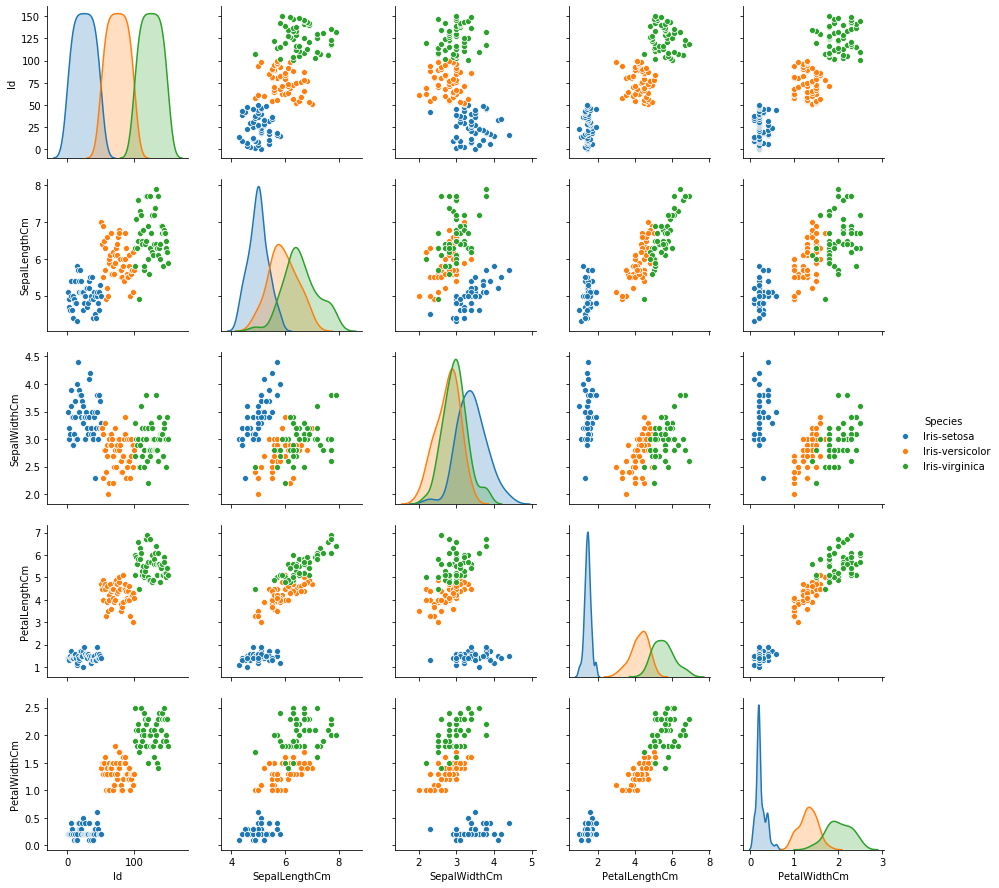

In [12]:
sns.pairplot(df,hue='Species')

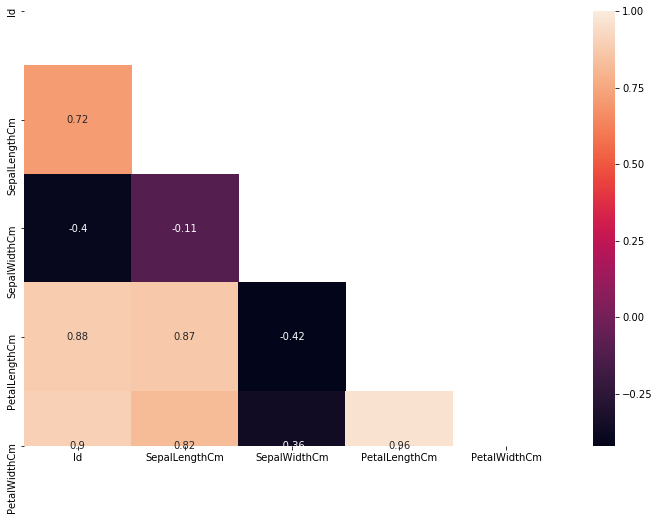

In [13]:
plt.figure(figsize=(12,8))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(df.corr(),annot=True,mask=mask)

In [14]:
"""Model Building"""

'Model Building'

In [15]:
df=df.drop('Id',axis=1)

In [16]:
le=LabelEncoder()
df.Species=le.fit_transform(df.Species)
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,4.4,3.0,1.3,0.2,0
116,6.5,3.0,5.5,1.8,2
18,5.7,3.8,1.7,0.3,0
132,6.4,2.8,5.6,2.2,2
35,5.0,3.2,1.2,0.2,0


In [17]:
y=df.Species
x=df.drop('Species',axis=1)
x.shape,y.shape

((150, 4), (150,))

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [19]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [20]:
pac=PassiveAggressiveClassifier()
pac.fit(x_train,y_train)
prediction=pac.predict(x_test)

In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [22]:
cm=confusion_matrix(y_test,prediction)


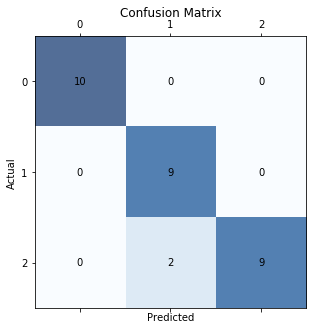

In [23]:
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
    

In [24]:
print('Accuracy Score',accuracy_score(y_test,prediction)*100)

Accuracy Score 93.33333333333333
